<a href="https://colab.research.google.com/github/David8523/Udemy_projects/blob/main/Blue_Bank_Loan_Info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blue Bank Loan Analysis
### 1. Project introduction and background
Blue Bank is a bank in USA that has a loan department which is currently understaffed.They supply loans to individuals and don’t have much reporting on how risky these borrowers are.

Using Python and Tableau, they’d like to see a report of borrowers who may have issues paying back the loan.

## 2. Data Exploration and Manipulation
### 2.1 Importing the libraries, visualizing the data and understanding the variables

In [ ]:
#importing the required libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading dataset into dataframe
#from google.colab import files
#uploaded = files.upload()
# Method  to read JSON data
json_file = open('loan_data_json.json')
data = json.load(json_file)



In [ ]:
# Convert the list file (data) into a dataframe
loandata = pd.DataFrame(data)

In [ ]:

# Find unique values in a column
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [ ]:
loandata.index

RangeIndex(start=0, stop=9578, step=1)

In [ ]:
# describe the data
loandata.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loandata.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


###Below are the columns used and their explanation:
* Credit.policy: 1 if the customer meets the credit underwriting criteria of Blue Bank, and 0 otherwise.
* Purpose: The purpose of the loan (takes values "credit_card"
,"debt_consolidation"
, "educational" ,"major_purchase","small_business", and "all_other") 
* Int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by Blue Bank to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower
* Dti: Debt-to-Income Ratio.
* Fico: Credit score used to determine someone's credit worthiness, 
* days.with.cr.line: Number of days that the borrower have had a credit line
* Revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* Revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* Inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months. (If there are a lot of inquiries, that’s an issue
* Delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* Pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* Not.fully.paid: If the loan is been fully paid

###2.2 Data manipulation

In [ ]:
# Using EXP() to get the annual income
income = np.exp(loandata['log.annual.inc'])

In [ ]:
# Insert income into the dataframe as a column (while rouding it)
loandata['annualincome'] = round(income)

#### FICO and loan risk categorization

In [ ]:
# FICO Score
# fico < 400: 'Very Poor'
# fico >= 400 and < 600: 'Poor'
# fico >= 600 and < 660: 'Fair'
# fico >= 660 and < 780: 'Good'
# fico >= 780: 'Excellent'

ficocat = []
for n in range (0, len(loandata['fico'])):
    
    if loandata['fico'][n] < 400:
        ficocat.append('Very Poor')
    elif loandata['fico'][n] >= 400 and loandata['fico'][n] < 600:
        ficocat.append('Poor')
    elif loandata['fico'][n] >= 600 and loandata['fico'][n] < 660:
        ficocat.append('Fair')
    elif loandata['fico'][n] >= 660 and loandata['fico'][n] < 780:
        ficocat.append('Good')
    elif loandata['fico'][n] >= 780:
        ficocat.append('Excellent')
    else:
        ficocat.append('Unknown')
# convert list to series
ficocat = pd.Series(ficocat)
# add series to df as a column
loandata['ficocategory'] = ficocat

In [ ]:
# df.loc as conditional statement
# df.loc[df[columnname] condition, newcolumnname] = 'value if the condition is met'

# create a new column based on conditions of interest rate, where rate > 0.12 then high, else low

loandata.loc[loandata['int.rate'] > 0.12, 'int.rate.type'] = 'high'
loandata.loc[loandata['int.rate'] <= 0.12, 'int.rate.type'] = 'low'

In [ ]:
loandata.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annualincome,int.rate.type,ficocategory
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0,low,Good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0,low,Good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0,high,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0,low,Good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0,high,Good


### 2.3 Basic Data Visualization

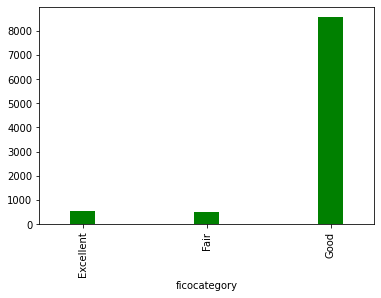

In [ ]:
# number of loans(rows) by fico.category
catplot = loandata.groupby(['ficocategory']).size()
catplot.plot.bar(color='green', width=0.2)
plt.show()

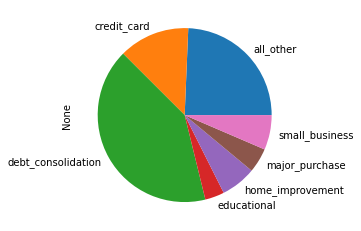

In [ ]:
# number of loans(rows) by purpose
purplot = loandata.groupby(['purpose']).size()
purplot.plot.pie()
plt.show()


### 2.4 Convert to CSV

In [ ]:

# writing to csv
loandata.to_csv('loan_cleaned.csv', index=True)

## 3. Final Visualization and Tableau Dashboard
We finish this project by visualizing the data in on of the most popular BI tool for Data Visualization. [Link visualization Here](https://public.tableau.com/app/profile/david.de.la.iglesia/viz/BlueBankLoanInfo/BlueBankLoans)